<a href="https://colab.research.google.com/github/l3t022/Clase_Analitica/blob/main/colab/tarea_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

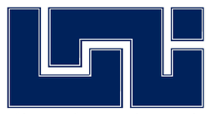

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Torres Gutierrez, Leopoldo Jose
~~~

# **Tarea Modelos Regresión**

## **Objetivo**

Crear un modelo de regresion que pueda predecir el precio de un automovil usado, con cilindraje estandar y de uso personal en las ciudades de USA.

## **Conjunto de Datos**

Se utilizará el siguiente conjunto de datos de automóviles usados, que muestra un listado de vehículos en USA, cuya información es gestionada en la Web de Craigslist.org -
La Base de Datos fue obtenida en [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)

Nuestra variable objetivo es el precio del auto y el conjunto de datos posee 16 variables adicionales:

- **id:** identificador / registro de la Base de Datos.
- **price:** precio del automovil.
- **year:** año de fabricación.
- **manufacturer:** nombre del fabricante.
- **model:** modelo del auto.
- **condition:** estado del carro.
- **cylinders:** cilindraje del auto.
- **fuel:** tipo de combustible que utiliza.
- **odometer:** número de millas recorridas.
- **title_status:** grado o estatus de propiedad del bien.
- **transmission:** tipo de transmisión del automovil (automatica, mecanica, otro).
- **drive:** tipo de tracción del carro (trasera, delantera, etc.)
- **size:** tamaño del auto  (compacto, mediano, grande).
- **type:** tipo de automovil.
- **paint_color:** color del auto.
- **state:** nombre del Estado en USA.
- **posting_date:** hora de registro del dato en la DB.

## **Carga de módulos y Datos**



Carga de librerías necesarias

In [1]:
# Analisis de datos
import pandas as pd 
import numpy as np
import statsmodels.api as sm

# Modelo y preprocesamiento
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Librerias de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import scipy as sp
from scipy import stats

# Configuración warnings
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

# Libreria para serializar
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carga de los datos que se utilizarán para crear el DataFrame

In [2]:
url = "https://raw.githubusercontent.com/l3t022/Clase_Analitica/main/csv/"

In [3]:
archivo = "vehicles1.csv"

In [4]:
datos = pd.read_csv(url+archivo)
datos.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500
1,7315039307,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,full-size,SUV,NaN,al,2021-04-30T16:35:11-0500
2,7314560853,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,2021-04-29T17:19:18-0500
3,7313406529,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,2021-04-27T12:20:01-0500
4,7312847466,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,2021-04-26T11:15:36-0500


## **Limpieza de los Datos**

Revision rapida de las variables y nulos

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84247 entries, 0 to 84246
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            84247 non-null  int64  
 1   price         84247 non-null  int64  
 2   year          84247 non-null  float64
 3   manufacturer  81014 non-null  object 
 4   model         83634 non-null  object 
 5   condition     84247 non-null  object 
 6   cylinders     81113 non-null  object 
 7   fuel          84247 non-null  object 
 8   odometer      84247 non-null  float64
 9   title_status  84247 non-null  object 
 10  transmission  84234 non-null  object 
 11  drive         80160 non-null  object 
 12  size          84247 non-null  object 
 13  type          81709 non-null  object 
 14  paint_color   81038 non-null  object 
 15  state         84247 non-null  object 
 16  posting_date  84247 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 10.9+ MB


Se detectó que hay valores nulos en varias variables predictoras. Se hizo un conteo para determinar las cantidades:

In [6]:
datos.isna().sum().sort_values()

id                 0
size               0
title_status       0
state              0
fuel               0
odometer           0
year               0
price              0
condition          0
posting_date       0
transmission      13
model            613
type            2538
cylinders       3134
paint_color     3209
manufacturer    3233
drive           4087
dtype: int64

Primero, se eliminó los valores duplicados y posteriormente se realizó un cambio en el tipo de datos de la variable *'year'* y *'posting_date'*.  

In [7]:
datos.drop_duplicates(inplace=True)  #eliminar duplicados

In [8]:
datos['year'] = datos['year'].astype(int) #convertir de float64 a int64

In [9]:
datos['posting_date'] = pd.to_datetime(datos['posting_date'], utc=True) #convertir de object a fecha

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84247 entries, 0 to 84246
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            84247 non-null  int64              
 1   price         84247 non-null  int64              
 2   year          84247 non-null  int64              
 3   manufacturer  81014 non-null  object             
 4   model         83634 non-null  object             
 5   condition     84247 non-null  object             
 6   cylinders     81113 non-null  object             
 7   fuel          84247 non-null  object             
 8   odometer      84247 non-null  float64            
 9   title_status  84247 non-null  object             
 10  transmission  84234 non-null  object             
 11  drive         80160 non-null  object             
 12  size          84247 non-null  object             
 13  type          81709 non-null  object             
 14  paint_

Revisando los valores unicos de las variables *'year'* y *'posting_date'*.

In [11]:
datos.year.unique()

array([2013, 2011, 2004, 2012, 2001, 2017, 2003, 2008, 2005, 2018, 2019,
       2006, 2014, 2009, 2002, 2016, 2007, 2015, 2010, 2020])

In [12]:
datos.posting_date.unique()

<DatetimeArray>
['2021-05-03 19:02:03+00:00', '2021-04-30 21:35:11+00:00',
 '2021-04-29 22:19:18+00:00', '2021-04-27 17:20:01+00:00',
 '2021-04-26 16:15:36+00:00', '2021-04-24 23:39:59+00:00',
 '2021-04-22 00:26:56+00:00', '2021-04-16 15:40:58+00:00',
 '2021-04-13 22:05:44+00:00', '2021-04-13 16:20:25+00:00',
 ...
 '2021-04-07 20:42:53+00:00', '2021-04-07 20:42:54+00:00',
 '2021-04-07 20:42:51+00:00', '2021-04-07 20:42:50+00:00',
 '2021-04-07 20:18:57+00:00', '2021-04-07 17:58:09+00:00',
 '2021-04-07 15:06:54+00:00', '2021-04-07 15:03:17+00:00',
 '2021-04-07 03:04:03+00:00', '2021-04-05 21:18:42+00:00']
Length: 79328, dtype: datetime64[ns, UTC]

Para el caso de *'posting_date'* se observo que todos los valores fueron publicados en el 2021, por lo que se eliminaran para simplificar el modelo.

El siguiente paso para la limpieza de los datos fue eliminar las variables innecesarias: *'id'* y *'posting_date'*

In [13]:
datos = datos.drop(columns=["id", "posting_date"])
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84247 entries, 0 to 84246
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         84247 non-null  int64  
 1   year          84247 non-null  int64  
 2   manufacturer  81014 non-null  object 
 3   model         83634 non-null  object 
 4   condition     84247 non-null  object 
 5   cylinders     81113 non-null  object 
 6   fuel          84247 non-null  object 
 7   odometer      84247 non-null  float64
 8   title_status  84247 non-null  object 
 9   transmission  84234 non-null  object 
 10  drive         80160 non-null  object 
 11  size          84247 non-null  object 
 12  type          81709 non-null  object 
 13  paint_color   81038 non-null  object 
 14  state         84247 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 10.3+ MB


Seguidamente se observaron las variables numéricas

In [14]:
datos.select_dtypes(include=['float64', 'int']).describe()

,price,year,odometer
count,8.424700e+04,84247.000000,8.424700e+04
mean,6.203435e+04,2010.849158,1.221422e+05
std,1.289064e+07,4.840334,1.968535e+05
min,0.000000e+00,2001.000000,0.000000e+00
25%,4.995000e+03,2007.000000,7.430200e+04
50%,9.395000e+03,2011.000000,1.146000e+05
75%,1.799500e+04,2015.000000,1.545580e+05
max,3.736929e+09,2020.000000,9.999999e+06


Se eliminaran los valores de *'year'* del 2020, por temas de solo analizar comportamientos pre-pandemia COVID 2019

In [15]:
datos=datos[datos.year < 2020] #Se eliminan valores de "year" > 2019
datos.year.unique()

array([2013, 2011, 2004, 2012, 2001, 2017, 2003, 2008, 2005, 2018, 2019,
       2006, 2014, 2009, 2002, 2016, 2007, 2015, 2010])

Se observaron cifras minimas en la variable *'price'* con valor cero. El mismo comportamiento mostró la variable *'odometer'*. En el extremo opuesto, *'price'* y *'odometer'* poseen valores superiores al millón.
En ese sentido se requiere a acotarlos, eliminando los valores extremos.

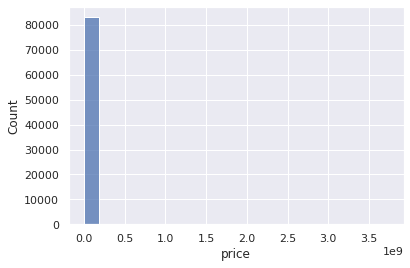

In [16]:
# Histograma variable 'price'
sns.set(style="darkgrid")

sns.histplot(data=datos, x="price", kde=False, bins=20)
plt.show()

In [17]:
datos[datos.price > 30000].shape

(7572, 15)

In [18]:
datos[datos.price < 950].shape

(5911, 15)

In [19]:
datos=datos[(datos.price < 30000) & (datos.price >= 950 )]
datos.shape

(69462, 15)

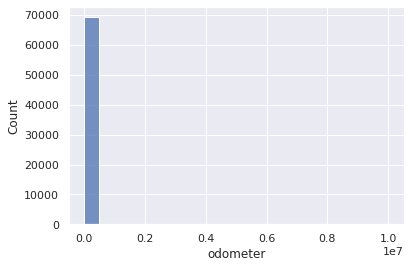

In [20]:
# Histograma variable 'odometer'
sns.set(style="darkgrid")

sns.histplot(data=datos, x="odometer", kde=False, bins=20)
plt.show()

In [21]:
datos[datos.odometer < 1000].shape

(570, 15)

In [22]:
datos[datos.odometer > 300000].shape

(541, 15)

In [23]:
datos=datos[(datos.odometer < 300000) & (datos.odometer >= 1000 )]
datos.shape

(68308, 15)

In [24]:
# Instalar librerias de gráficos
#import matplotlib.pyplot as plt
#from matplotlib import style
#import matplotlib.ticker as ticker
#import seaborn as sns
#import plotly.express as px
#import plotly.figure_factory as ff

In [25]:
datos.select_dtypes(include=['float64', 'int']).describe()

,price,year,odometer
count,68308.000000,68308.000000,68308.000000
mean,11058.141726,2010.021564,124790.273540
std,7122.887178,4.520463,54188.594331
min,950.000000,2001.000000,1000.000000
25%,5500.000000,2007.000000,87545.250000
50%,8995.000000,2010.000000,122707.500000
75%,15000.000000,2014.000000,160000.000000
max,29999.000000,2019.000000,299852.000000


Posteriormente se observaron las variables categoricas

In [26]:
datos.select_dtypes(include=['object']).describe()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,65996,67832,68308,65846,68308,68308,68300,64958,68308,66317,65778,68308
unique,38,8536,6,8,5,6,3,3,4,13,12,51
top,ford,f-150,excellent,4 cylinders,gas,clean,automatic,fwd,full-size,sedan,white,ca
freq,11733,1365,34431,25444,64060,63915,63865,27472,36132,21017,15278,7400


In [27]:
datos.isna().sum().sort_values()

price              0
year               0
condition          0
fuel               0
odometer           0
title_status       0
size               0
state              0
transmission       8
model            476
type            1991
manufacturer    2312
cylinders       2462
paint_color     2530
drive           3350
dtype: int64

In [28]:
datos.isnull().sum().sort_values()

price              0
year               0
condition          0
fuel               0
odometer           0
title_status       0
size               0
state              0
transmission       8
model            476
type            1991
manufacturer    2312
cylinders       2462
paint_color     2530
drive           3350
dtype: int64

Se analizaron las siguientes variables:

a) 'cilinders'

In [29]:
datos.cylinders.value_counts()

4 cylinders     25444
6 cylinders     23146
8 cylinders     15798
5 cylinders       724
10 cylinders      363
other             211
3 cylinders       135
12 cylinders       25
Name: cylinders, dtype: int64

In [30]:
# Se probo con valores n=3, 5, 10, 12 en 'n cylinders' y 'other'
datos[datos.cylinders == '5 cylinders'].shape

(724, 15)

Se van a eliminar los valores de cilindraje no comunes: '3 cylinders', '5 cylinders', y mayor '8 cylinders'

In [31]:
datos=datos[(datos.cylinders != '3 cylinders') & (datos.cylinders != '5 cylinders') & (datos.cylinders != '10 cylinders') & (datos.cylinders != '12 cylinders') & (datos.cylinders != 'other')]
datos.shape

(66850, 15)

b) 'type'

In [32]:
datos.type.value_counts()

sedan          20597
SUV            18114
truck           8413
pickup          4461
hatchback       3144
coupe           2827
van             2140
mini-van        1861
convertible     1376
wagon           1363
other            338
offroad          177
bus               89
Name: type, dtype: int64

In [33]:
# Se probo con valores de 'bus', 'offroad', 'truck'  y 'other'
datos[datos.type == 'other'].shape

(338, 15)

Se van a eliminar los valores que no son carros de ciudad: 'bus', 'offroad', 'truck' y 'other'

In [34]:
datos=datos[(datos.type != 'bus') & (datos.type != 'truck') & (datos.type != 'offroad') & (datos.type != 'other')]
datos.shape

(57833, 15)

c) 'manufacturer'

In [35]:
datos.manufacturer.value_counts()

ford               8514
chevrolet          6830
toyota             5371
honda              4753
nissan             3520
jeep               2167
dodge              2017
subaru             1938
bmw                1889
hyundai            1805
gmc                1568
mercedes-benz      1407
kia                1398
volkswagen         1392
chrysler           1367
lexus              1125
cadillac            939
mazda               914
buick               885
audi                864
ram                 785
acura               680
infiniti            611
lincoln             545
pontiac             516
mini                454
mitsubishi          373
saturn              337
volvo               300
mercury             275
rover               268
jaguar              165
fiat                117
porsche             117
harley-davidson      21
alfa-romeo           13
land rover            5
Name: manufacturer, dtype: int64

Se eliminaron aquellos valores con observaciones menores a 300, siguiendo la recomendación de que sean como mínimo entre 10 y 20 veces el número de predictores del modelo

In [36]:
# Se probo con valores de 'mercury', 'rover', 'jaguar', 'fiat', 'porsche', 'harley-davidson', 'alfa-romeo'  y 'land rover'
datos[datos.manufacturer == 'mercury'].shape

(275, 15)

In [37]:
datos=datos[(datos.manufacturer != 'mercury') & (datos.manufacturer != 'rover') & (datos.manufacturer != 'jaguar') & (datos.manufacturer != 'fiat') 
& (datos.manufacturer != 'porsche') & (datos.manufacturer != 'harley-davidson') & (datos.manufacturer != 'alfa-romeo') & (datos.manufacturer != 'land rover')]
datos.shape

(56852, 15)

d) 'model'

Se reviso la variable 'model' y la gran cantidad de valores unicos

In [38]:
datos.model.value_counts()

camry                  650
accord                 623
civic                  576
f-150                  522
altima                 512
                      ... 
4runner sr5 **4wd**      1
focus slt                1
captiva ls               1
benz e320 sport          1
excursion ltd            1
Name: model, Length: 7284, dtype: int64

In [39]:
datos.model.unique().tolist()

['f250 super duty',
 'odyssey',
 'charger rt 4dr sedan',
 'town & country',
 'grand cherokee laredo',
 'tlx',
 'rx350',
 'gx470',
 'thunderbird',
 'echo',
 'blazer',
 'yukon xl',
 'accord',
 'miata mx-5',
 'impala',
 'altima 3.5 sl',
 'benz c350',
 'pathfinder',
 'q7',
 'trax',
 'eclipse',
 'prius',
 'scion ia',
 'camry',
 'charger',
 'solara',
 'ex35',
 'prius v hybrid',
 'rogue sv',
 'trailblazer',
 'sorento lx',
 'f150 regular cab xl',
 'fj cruiser 4x4',
 'benz ml 450',
 'grand am gt 1',
 'f-250 super duty xl',
 'cr-v ex-l',
 'accent',
 'escape hev',
 'accord crosstour exl',
 '1500 express',
 'tl',
 'sonata',
 'escalade',
 'cherokee sport',
 'a3 tdi premium plus',
 'sx4 se',
 'camry xle',
 'express',
 'transit connect',
 'transit 150',
 '3i',
 'commander sport',
 '1500 slt',
 'wrangler unlimited sahara',
 'wrangler',
 'sonic lt',
 'altima 2.5 s',
 'f-150',
 'maxima',
 '4runner limited',
 'tacoma',
 'silverado 1500 lt',
 '4runner 4wd',
 'econoline cargo van',
 'cr-v lx',
 'cx-9 touri

Dada la complejidad de limpieza la variable 'model' y el tiempo limitado, se tomo la decision de limitar aun mas la regresion, solo a un fabricante: Ford

In [40]:
datos=datos[(datos.manufacturer == 'ford')] # Reduccion al fabricante Ford
datos.shape

(8514, 15)

In [41]:
datos.model.unique().tolist() # Revisando los valores unicos de los modelos, limitado al fabricante ford

['f250 super duty',
 'thunderbird',
 'f150 regular cab xl',
 'f-250 super duty xl',
 'escape hev',
 'transit connect',
 'transit 150',
 'f-150',
 'econoline cargo van',
 'f350 super duty',
 'edge sel',
 'escape',
 'focus',
 'e250',
 'taurus',
 'five hundred',
 'sport trac',
 'fusion se',
 'econoline cargo',
 'escape sel',
 'explorer',
 'escape se 4wd',
 'expedition',
 'mustang gt premium',
 'thunderbird deluxe',
 'focus se',
 'focus se flex fuel',
 'ranger edge 4x4',
 'focus ses',
 'fusion sel',
 'transit van',
 'svt focus',
 'expedition xlt',
 'escape se',
 'transit connect xlt',
 'fusion',
 'flex se',
 'f-150 xl 4x4',
 'expedition platinum 4x4 gas',
 'escape xlt',
 'f-350',
 'mustang',
 'fiesta',
 'transit xlt',
 'mustang premium',
 'edge sel awd',
 'f-150 lariat',
 'escape se 4x4',
 'escape limited',
 'fiesta se',
 'edge',
 'mustang svt cobra',
 'flex',
 'edgetitanium awd',
 'expedition xlt 4x4',
 'fusion titanium',
 'f-150 xlt',
 'taurus limited awd',
 'e 350',
 'f-250 super duty',

Se revisaron el resto de las variables y no se realizaron mas depuraciones.

In [42]:
datos.isna().sum().sort_values()

price             0
year              0
manufacturer      0
condition         0
fuel              0
odometer          0
title_status      0
size              0
state             0
transmission      4
model            40
paint_color     271
cylinders       320
type            376
drive           441
dtype: int64

Se decide que a partir de este punto se completaran los datos faltantes usado el metodo *ffill*

In [43]:
datos['drive'] = datos['drive'].fillna(method='ffill')
datos['paint_color'] = datos['paint_color'].fillna(method='ffill')
datos['cylinders'] = datos['cylinders'].fillna(method='ffill')
datos['type'] = datos['type'].fillna(method='ffill')
datos['manufacturer'] = datos['manufacturer'].fillna(method='ffill')
datos['model'] = datos['model'].fillna(method='ffill')
datos['transmission'] = datos['transmission'].fillna(method='ffill')

In [44]:
datos.isna().sum().sort_values()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [45]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 2 to 84212
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8514 non-null   int64  
 1   year          8514 non-null   int64  
 2   manufacturer  8514 non-null   object 
 3   model         8514 non-null   object 
 4   condition     8514 non-null   object 
 5   cylinders     8514 non-null   object 
 6   fuel          8514 non-null   object 
 7   odometer      8514 non-null   float64
 8   title_status  8514 non-null   object 
 9   transmission  8514 non-null   object 
 10  drive         8514 non-null   object 
 11  size          8514 non-null   object 
 12  type          8514 non-null   object 
 13  paint_color   8514 non-null   object 
 14  state         8514 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


## **Análisis Exploratorio de los Datos (EDA)**

Se procedio a realizar una exploracion de los datos.

In [46]:
datos.head(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2,19900,2004,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
18,21250,2002,ford,thunderbird,new,8 cylinders,gas,15996.0,clean,automatic,fwd,compact,convertible,yellow,al
60,24888,2019,ford,f150 regular cab xl,excellent,6 cylinders,gas,8176.0,clean,automatic,rwd,full-size,pickup,white,al
67,11500,2008,ford,f-250 super duty xl,good,8 cylinders,diesel,283356.0,clean,automatic,rwd,full-size,pickup,white,al
73,6900,2008,ford,escape hev,good,4 cylinders,hybrid,103550.0,clean,automatic,fwd,mid-size,SUV,white,al
112,24888,2019,ford,f150 regular cab xl,excellent,6 cylinders,gas,8176.0,clean,automatic,rwd,full-size,pickup,white,al
121,9500,2014,ford,transit connect,excellent,4 cylinders,gas,219581.0,clean,automatic,fwd,full-size,van,white,al
122,17200,2014,ford,transit connect,excellent,4 cylinders,gas,45026.0,clean,automatic,fwd,full-size,van,white,al
123,23900,2017,ford,transit 150,excellent,6 cylinders,gas,108482.0,clean,automatic,rwd,full-size,van,white,al
124,22300,2017,ford,transit 150,excellent,6 cylinders,gas,113617.0,clean,automatic,rwd,full-size,van,white,al


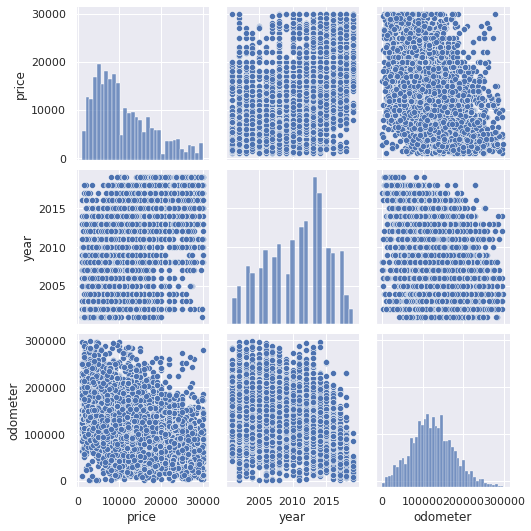

In [47]:
sns.pairplot(datos)

In [48]:
categoria = datos.columns
numerico = ['price', 'year', 'odometer']
categorical = datos.drop(numerico, axis=1)
numerical = datos[numerico]
categorical.head()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
2,ford,f250 super duty,good,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,blue,al
18,ford,thunderbird,new,8 cylinders,gas,clean,automatic,fwd,compact,convertible,yellow,al
60,ford,f150 regular cab xl,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,pickup,white,al
67,ford,f-250 super duty xl,good,8 cylinders,diesel,clean,automatic,rwd,full-size,pickup,white,al
73,ford,escape hev,good,4 cylinders,hybrid,clean,automatic,fwd,mid-size,SUV,white,al


In [49]:
numerical.head()

,price,year,odometer
2,19900,2004,88000.0
18,21250,2002,15996.0
60,24888,2019,8176.0
67,11500,2008,283356.0
73,6900,2008,103550.0


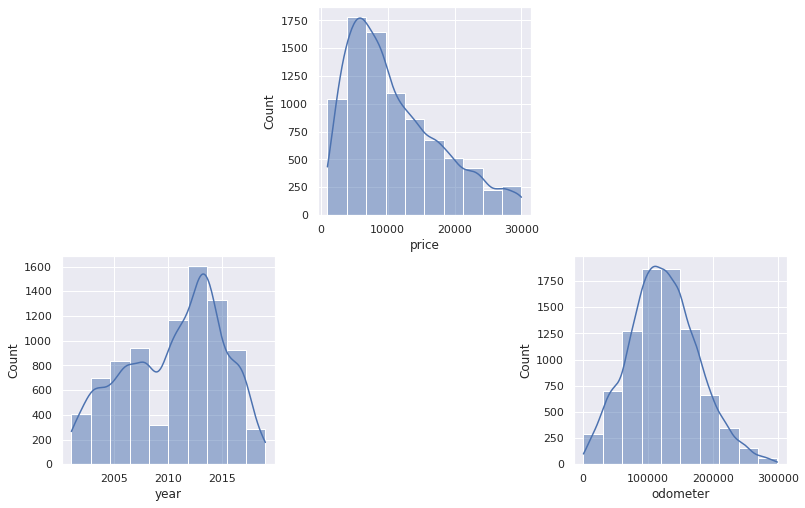

In [50]:
# Histogramas para las variables 'numerical'
sns.set(style="darkgrid")

fig=plt.figure(figsize=(13,13))
axes=330

for nun in numerical:
    axes += 2
    fig.add_subplot(axes)
    #setting titulos de num
    sns.histplot(data = numerical, x=nun, kde=True, bins=10) 
plt.show()

Se reviso si aun existian valores fuera de rangos (outlier)

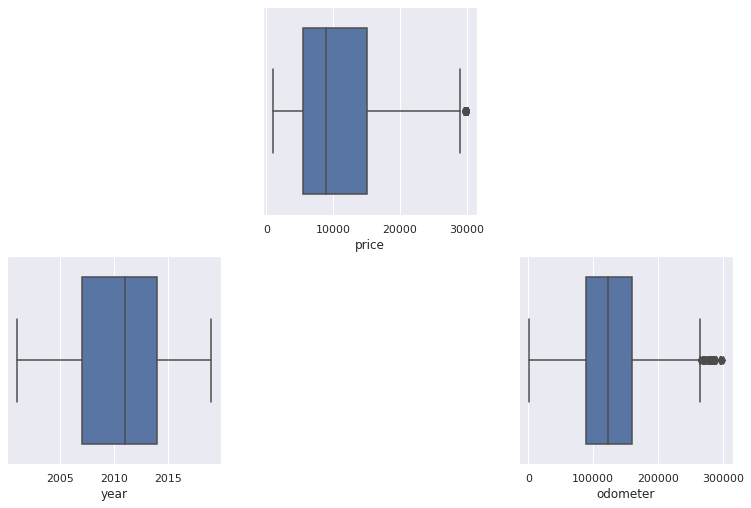

In [51]:
# Boxplot para las variables 'numerical'
sns.set(style="darkgrid")

fig=plt.figure(figsize=(13,13))
axes=330

for num in numerical:
    axes += 2
    fig.add_subplot(axes)
    #setting titulos de num
    sns.boxplot(data = numerical, x=num)
plt.show()

Se procedio a depurar los datos de la variable *'model'*, los mismos datos con diferente escritura

In [52]:
datos.model.value_counts()

f-150                       524
escape                      462
focus                       368
mustang                     350
explorer                    331
                           ... 
fusion titanium sedan 4d      1
pickup                        1
exployer limited              1
f150 supercrew xlt            1
mustang gt convetrible        1
Name: model, Length: 848, dtype: int64

In [53]:
# Homologacion de escritura de datos similares
datos['model'][datos['model'].str.contains('f15o', case=False)] = 'f-150'
datos['model'][datos['model'].str.contains('f150', case=False)] = 'f-150'
datos['model'][datos['model'].str.contains('f-150', case=False)] = 'f-150'
datos['model'][datos['model'].str.contains('f 150', case=False)] = 'f-150'
datos['model'][datos['model'].str.contains('f250', case=False)] = 'f-250'
datos['model'][datos['model'].str.contains('f-250', case=False)] = 'f-250'
datos['model'][datos['model'].str.contains('f 250', case=False)] = 'f-250'
datos['model'][datos['model'].str.contains('f350', case=False)] = 'f-350'
datos['model'][datos['model'].str.contains('f-350', case=False)] = 'f-350'
datos['model'][datos['model'].str.contains('f 350', case=False)] = 'f-350'


datos['model'][datos['model'].str.contains('f450', case=False)] = 'f-450'
datos['model'][datos['model'].str.contains('f-450', case=False)] = 'f-450'
datos['model'][datos['model'].str.contains('f 450', case=False)] = 'f-450'
datos['model'][datos['model'].str.contains('f550', case=False)] = 'f-550'
datos['model'][datos['model'].str.contains('f-550', case=False)] = 'f-550'
datos['model'][datos['model'].str.contains('f 550', case=False)] = 'f-550'
datos['model'][datos['model'].str.contains('t150', case=False)] = 't-150'
datos['model'][datos['model'].str.contains('t-150', case=False)] = 't-150'
datos['model'][datos['model'].str.contains('t 150', case=False)] = 't-150'
datos['model'][datos['model'].str.contains('t250', case=False)] = 't-250'
datos['model'][datos['model'].str.contains('t-250', case=False)] = 't-250'
datos['model'][datos['model'].str.contains('t 250', case=False)] = 't-250'
datos['model'][datos['model'].str.contains('t350', case=False)] = 't-350'
datos['model'][datos['model'].str.contains('t-350', case=False)] = 't-350'
datos['model'][datos['model'].str.contains('t 350', case=False)] = 't-350'
datos['model'][datos['model'].str.contains('f-330', case=False)] = 'f-350'

datos['model'][datos['model'].str.contains('crown', case=False)] = 'crown'
datos['model'][datos['model'].str.contains('criwn', case=False)] = 'crown'
datos['model'][datos['model'].str.contains('crow', case=False)] = 'crown'
datos['model'][datos['model'].str.contains('interceptor', case=False)] = 'crown'
datos['model'][datos['model'].str.contains('police', case=False)] = 'crown'
datos['model'][datos['model'].str.contains('c-max', case=False)] = 'c-max'
datos['model'][datos['model'].str.contains('c max', case=False)] = 'c-max'
datos['model'][datos['model'].str.contains('cmax', case=False)] = 'c-max'
datos['model'][datos['model'].str.contains('econoline', case=False)] = 'econoline'
datos['model'][datos['model'].str.contains('ecosport', case=False)] = 'ecosport'
datos['model'][datos['model'].str.contains('edge', case=False)] = 'edge'
datos['model'][datos['model'].str.contains('ecape', case=False)] = 'escape'
datos['model'][datos['model'].str.contains('esape', case=False)] = 'escape'
datos['model'][datos['model'].str.contains('escape', case=False)] = 'escape'
datos['model'][datos['model'].str.contains('excape', case=False)] = 'escape'
datos['model'][datos['model'].str.contains('escort', case=False)] = 'escort'
datos['model'][datos['model'].str.contains('excursion', case=False)] = 'excursion'
datos['model'][datos['model'].str.contains('excusrion', case=False)] = 'excursion'
datos['model'][datos['model'].str.contains('explorer', case=False)] = 'explorer'
datos['model'][datos['model'].str.contains('exployer', case=False)] = 'explorer'
datos['model'][datos['model'].str.contains('sport', case=False)] = 'explorer'
datos['model'][datos['model'].str.contains('sporttrac', case=False)] = 'explorer'
datos['model'][datos['model'].str.contains('expe', case=False)] = 'expedition'
datos['model'][datos['model'].str.contains('expedition', case=False)] = 'expedition'
datos['model'][datos['model'].str.contains('expidition', case=False)] = 'expedition'
datos['model'][datos['model'].str.contains('expadition', case=False)] = 'expedition'
datos['model'][datos['model'].str.contains('fiesta', case=False)] = 'fiesta'
datos['model'][datos['model'].str.contains('flex', case=False)] = 'flex'
datos['model'][datos['model'].str.contains('fles', case=False)] = 'flex'
datos['model'][datos['model'].str.contains('flax', case=False)] = 'flex'
datos['model'][datos['model'].str.contains('freestar', case=False)] = 'freestar'
datos['model'][datos['model'].str.contains('freestyle', case=False)] = 'freestyle'
datos['model'][datos['model'].str.contains('focus', case=False)] = 'focus'
datos['model'][datos['model'].str.contains('fusion', case=False)] = 'fusion'
datos['model'][datos['model'].str.contains('fuion', case=False)] = 'fusion'
datos['model'][datos['model'].str.contains('mustang', case=False)] = 'mustang'
datos['model'][datos['model'].str.contains('shelby', case=False)] = 'mustang'
 
datos['model'][datos['model'].str.contains('ranger', case=False)] = 'ranger'
datos['model'][datos['model'].str.contains('thunderbird', case=False)] = 'thunderbird'
datos['model'][datos['model'].str.contains('t-bird', case=False)] = 'thunderbird'
datos['model'][datos['model'].str.contains('tbird', case=False)] = 'thunderbird'
datos['model'][datos['model'].str.contains('tarus', case=False)] = 'taurus'
datos['model'][datos['model'].str.contains('taurus', case=False)] = 'taurus'
datos['model'][datos['model'].str.contains('taurux', case=False)] = 'taurus'
datos['model'][datos['model'].str.contains('turus', case=False)] = 'taurus'
datos['model'][datos['model'].str.contains('tuarus', case=False)] = 'taurus'
datos['model'][datos['model'].str.contains('five hundred', case=False)] = 'taurus'
datos['model'][datos['model'].str.contains('fivehundred', case=False)] = 'taurus'
datos['model'][datos['model'].str.contains('windstar', case=False)] = 'windstar'

datos['model'][datos['model'].str.contains('e150', case=False)] = 'e-150'
datos['model'][datos['model'].str.contains('e-150', case=False)] = 'e-150'
datos['model'][datos['model'].str.contains('e 150', case=False)] = 'e-150'
datos['model'][datos['model'].str.contains('e250', case=False)] = 'e-250'
datos['model'][datos['model'].str.contains('e-250', case=False)] = 'e-250'
datos['model'][datos['model'].str.contains('e 250', case=False)] = 'e-250'
datos['model'][datos['model'].str.contains('e350', case=False)] = 'e-350'
datos['model'][datos['model'].str.contains('e-350', case=False)] = 'e-350'
datos['model'][datos['model'].str.contains('e 350', case=False)] = 'e-350'
datos['model'][datos['model'].str.contains('e450', case=False)] = 'e-450'
datos['model'][datos['model'].str.contains('e-450', case=False)] = 'e-450'
datos['model'][datos['model'].str.contains('e 450', case=False)] = 'e-450'

## **Codificacion**

Se asigno a un objeto la función LabelEncoder

In [54]:
import sklearn 
from sklearn.preprocessing import LabelEncoder

In [55]:
convertir = LabelEncoder()

In [56]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 2 to 84212
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  8514 non-null   object
 1   model         8514 non-null   object
 2   condition     8514 non-null   object
 3   cylinders     8514 non-null   object
 4   fuel          8514 non-null   object
 5   title_status  8514 non-null   object
 6   transmission  8514 non-null   object
 7   drive         8514 non-null   object
 8   size          8514 non-null   object
 9   type          8514 non-null   object
 10  paint_color   8514 non-null   object
 11  state         8514 non-null   object
dtypes: object(12)
memory usage: 1.2+ MB


Se convirtieron a string las columnas necesarias para luego poder aplicar LabelEncoder( )

In [57]:
datos.manufacturer = datos.manufacturer.apply(str) #0
datos.model = datos.model.apply(str)               #1
datos.condition = datos.condition.apply(str)       #2
datos.cylinders = datos.cylinders.apply(str)       #3
datos.fuel = datos.fuel.apply(str)                 #4
datos.title_status = datos.title_status.apply(str) #5
datos.transmission = datos.transmission.apply(str) #6
datos.drive = datos.drive.apply(str)               #7
#datos.size = datos.size.apply(str)                #8 AttributeError: 'numpy.int64' object has no attribute 'apply' (size es una propiedad!)
datos.type = datos.type.apply(str)                 #9
datos.paint_color = datos.paint_color.apply(str)   #10
datos.state = datos.state.apply(str)               #11

In [58]:
datos['size'] = datos['size'].apply(str)

Se procedio a la conversion...

In [59]:
datos.insert(4,column="nummodel",value=convertir.fit_transform(datos.model))
datos.insert(6,column="numcondition",value=convertir.fit_transform(datos.condition))
datos.insert(8,column="numcylinders",value=convertir.fit_transform(datos.cylinders))
datos.insert(10,column="numfuel",value=convertir.fit_transform(datos.fuel))
datos.insert(13,column="numtitle_status",value=convertir.fit_transform(datos.title_status))
datos.insert(15,column="numtransmission",value=convertir.fit_transform(datos.transmission))
datos.insert(17,column="numdrive",value=convertir.fit_transform(datos.drive))
datos.insert(19,column="numsize",value=convertir.fit_transform(datos['size']))
datos.insert(21,column="numtype",value=convertir.fit_transform(datos.type))
datos.insert(23,column="numpaint_color",value=convertir.fit_transform(datos.paint_color))
datos.insert(25,column="numstate",value=convertir.fit_transform(datos.state))

In [60]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 2 to 84212
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8514 non-null   int64  
 1   year             8514 non-null   int64  
 2   manufacturer     8514 non-null   object 
 3   model            8514 non-null   object 
 4   nummodel         8514 non-null   int64  
 5   condition        8514 non-null   object 
 6   numcondition     8514 non-null   int64  
 7   cylinders        8514 non-null   object 
 8   numcylinders     8514 non-null   int64  
 9   fuel             8514 non-null   object 
 10  numfuel          8514 non-null   int64  
 11  odometer         8514 non-null   float64
 12  title_status     8514 non-null   object 
 13  numtitle_status  8514 non-null   int64  
 14  transmission     8514 non-null   object 
 15  numtransmission  8514 non-null   int64  
 16  drive            8514 non-null   object 
 17  numdrive     

In [61]:
datos.head()

,price,year,manufacturer,model,nummodel,condition,numcondition,cylinders,numcylinders,fuel,numfuel,odometer,title_status,numtitle_status,transmission,numtransmission,drive,numdrive,size,numsize,type,numtype,paint_color,numpaint_color,state,numstate
2,19900,2004,ford,f-250,28,good,2,8 cylinders,2,diesel,0,88000.0,clean,0,automatic,0,4wd,0,full-size,1,pickup,5,blue,1,al,1
18,21250,2002,ford,thunderbird,53,new,4,8 cylinders,2,gas,2,15996.0,clean,0,automatic,0,fwd,1,compact,0,convertible,1,yellow,11,al,1
60,24888,2019,ford,f-150,27,excellent,0,6 cylinders,1,gas,2,8176.0,clean,0,automatic,0,rwd,2,full-size,1,pickup,5,white,10,al,1
67,11500,2008,ford,f-250,28,good,2,8 cylinders,2,diesel,0,283356.0,clean,0,automatic,0,rwd,2,full-size,1,pickup,5,white,10,al,1
73,6900,2008,ford,escape,21,good,2,4 cylinders,0,hybrid,3,103550.0,clean,0,automatic,0,fwd,1,mid-size,2,SUV,0,white,10,al,1


## **Mapas de Calor (correlacion)**

In [62]:
datoscorrelacion = datos.corr()

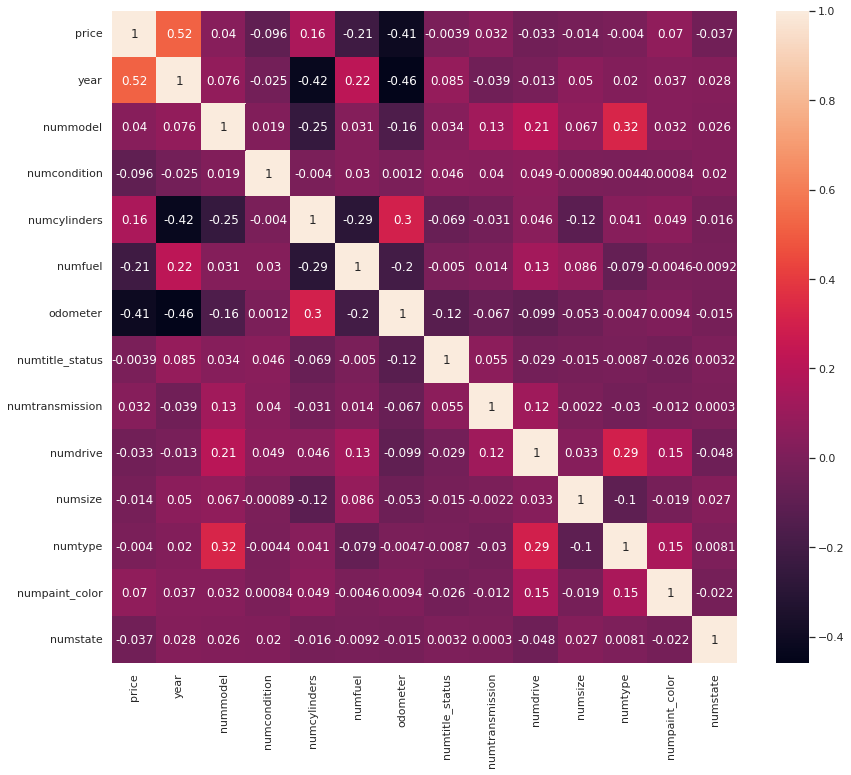

In [63]:
# Grafico de Heatmap
plt.figure(figsize=(14,12))
sns.heatmap(datoscorrelacion, annot=True)

plt.show()

Aca se identifico que las siguientes variables poseen una correlacion alrededor del 0.5, positiva como negativamente: *'price'*, *'year'* y *'odometer'*

Se procedio tambien a realizar un analisis de componentes principales para confirmar las variables para la regresion.

## **Análisis de Componentes Principales - PCA**

In [64]:
datosPCA = datos

In [65]:
datosPCAstd = (datosPCA - datosPCA.mean(axis=0)) / datosPCA.std(axis=0)

Se identificaron aquellas variables con nulos y se procedio a eliminar las categoricas

In [66]:
datosPCAstd.isnull().sum()

condition          8514
cylinders          8514
drive              8514
fuel               8514
manufacturer       8514
model              8514
numcondition          0
numcylinders          0
numdrive              0
numfuel               0
nummodel              0
numpaint_color        0
numsize               0
numstate              0
numtitle_status       0
numtransmission       0
numtype               0
odometer              0
paint_color        8514
price                 0
size               8514
state              8514
title_status       8514
transmission       8514
type               8514
year                  0
dtype: int64

In [67]:
datosPCAstd = datosPCAstd.drop(['condition', 'cylinders', 'drive', 'fuel', 'manufacturer', 'model', 'paint_color', 'size', 'state', 'title_status',
                       'transmission', 'type'], axis = 1)

Se procedio a crear 2 Componentes Principales

In [68]:
pca = PCA(2)
pca

PCA(n_components=2)

In [69]:
datosPCA = pca.fit_transform(datosPCAstd)

In [70]:
PCA_names = [f"PC{i+1}" for i in range(datosPCA.shape[1])]
PCA_names

['PC1', 'PC2']

In [71]:
datosPCA = pd.DataFrame(datosPCA, columns=PCA_names)
datosPCA.head()

,PC1,PC2
0,1.843670,-0.770273
1,-0.178827,0.972590
2,-2.857369,0.140750
3,3.256858,1.596766
4,-0.559775,-0.513209


In [72]:
#Grafica Análisis de Componentes Principales
fig = px.scatter(datosPCA, x="PC1",
                 y="PC2",
                 template="gridon",
                 title="Análisis de Componentes Principales")
fig.show()

Se analizo las variables que afectan positiva como negativmente:

In [73]:
dfPCA = pd.DataFrame(pca.components_.T,
                    columns=PCA_names,
                    index=datosPCAstd.columns)
dfPCA

,PC1,PC2
numcondition,0.014398,0.101934
numcylinders,0.399201,0.034656
numdrive,-0.111577,0.538107
numfuel,-0.242926,0.023993
nummodel,-0.258584,0.446563
numpaint_color,-0.038376,0.265877
numsize,-0.106434,-0.046333
numstate,-0.015944,-0.024553
numtitle_status,-0.117044,-0.044257
numtransmission,-0.073372,0.163410


In [74]:
dfPCA.style.highlight_max(color = 'lightgreen')

,PC1,PC2
numcondition,0.014398,0.101934
numcylinders,0.399201,0.034656
numdrive,-0.111577,0.538107
numfuel,-0.242926,0.023993
nummodel,-0.258584,0.446563
numpaint_color,-0.038376,0.265877
numsize,-0.106434,-0.046333
numstate,-0.015944,-0.024553
numtitle_status,-0.117044,-0.044257
numtransmission,-0.073372,0.163410


In [75]:
dfPCA.style.highlight_min(color = 'lightblue')

,PC1,PC2
numcondition,0.014398,0.101934
numcylinders,0.399201,0.034656
numdrive,-0.111577,0.538107
numfuel,-0.242926,0.023993
nummodel,-0.258584,0.446563
numpaint_color,-0.038376,0.265877
numsize,-0.106434,-0.046333
numstate,-0.015944,-0.024553
numtitle_status,-0.117044,-0.044257
numtransmission,-0.073372,0.163410


Entonces, para crear el modelo de precios del fabricante Ford se seleccionaron las siguientes 6 variables predictoras (con prefijo *num*): 'year', 'odometer', *'type'*, *'drive'*, *'cylinders'* y *'model'*

## **Creación del modelo de Regresión**

Se procedió a la división de los datos en train y test

In [76]:
datos1 = datos[['year', 'odometer', 'numtype', 'numdrive', 'numcylinders','nummodel', 'price']]
datos1 = datos1.reset_index(drop=True)  #reinicie el index del DataFrame                        # Se pudo usar: y = datos1.iloc[:,-1:]
datos1.index

RangeIndex(start=0, stop=8514, step=1)

In [77]:
datos1.head()

,year,odometer,numtype,numdrive,numcylinders,nummodel,price
0,2004,88000.0,5,0,2,28,19900
1,2002,15996.0,1,1,2,53,21250
2,2019,8176.0,5,2,1,27,24888
3,2008,283356.0,5,2,2,28,11500
4,2008,103550.0,0,1,0,21,6900


In [78]:
# Se guardo para correr un analisis con Pycaret
# datos1.to_csv(r'C:\Users\Torre\Downloads\reg_vehicles.csv', index=False)

#datos.to_csv('regr_vehicles.csv') # Datos originales
#from google.colab import files
#files.download("regr_vehicles.csv")

#datos1.to_csv('reg_vehicles.csv') # Datos normalizados
#from google.colab import files
#files.download("reg_vehicles.csv")

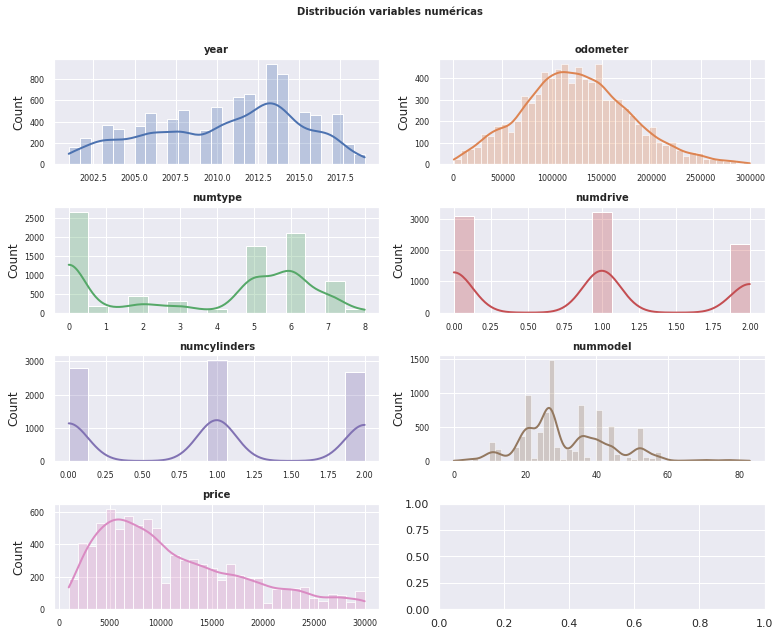

In [79]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 9))
axes = axes.flat
columnas_numeric = datos1.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(datos1.columns):
    sns.histplot(
        data    = datos1,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Se trabajo con los datos sin normalizar.

In [80]:
X = datos1.drop(['price'], axis= 1)  # Se pudo usar: X = datos1.iloc[:,0:-1]
y = datos1['price']                  # Se pudo usar: y = datos1.iloc[:,-1:]

In [81]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1),
                                                    train_size = 0.8,
                                                    random_state = 12345,
                                                    shuffle = True)

In [83]:
# Creación del modelo 

X_train = sm.add_constant(X_train, prepend=True) # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1253.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:38:22   Log-Likelihood:                -67349.
No. Observations:                6811   AIC:                         1.347e+05
Df Residuals:                    6804   BIC:                         1.348e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.865e+06   3.07e+04    -60.721   

El modelo de regresion lineal, con datos no normalizados, no brinda un buen modelo (R^2 = 0.525). Se probo con datos normalizados.

In [84]:
datos2 = datosPCAstd # Normalizado
datos2 = datos2.reset_index(drop=True)  #reinicie el index del DataFrame
datos2.index

RangeIndex(start=0, stop=8514, step=1)

In [85]:
datos2.columns

Index(['numcondition', 'numcylinders', 'numdrive', 'numfuel', 'nummodel',
       'numpaint_color', 'numsize', 'numstate', 'numtitle_status',
       'numtransmission', 'numtype', 'odometer', 'price', 'year'],
      dtype='object')

In [86]:
x = datos2[['year', 'odometer', 'numtype', 'numdrive', 'numcylinders','nummodel']]
Y = datos2['price']

In [87]:
Y

0       1.272512
1       1.466382
2       1.988826
3       0.066210
4      -0.594384
          ...   
8509    0.855333
8510    2.579340
8511    1.143122
8512    2.004767
8513    0.138014
Name: price, Length: 8514, dtype: float64

In [88]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y.values.reshape(-1,1),
                                                    train_size = 0.8,
                                                    random_state = 12345,
                                                    shuffle = True)

In [89]:
# Creación del modelo 

x_train = sm.add_constant(x_train, prepend=True) # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
modelo1 = sm.OLS(endog=Y_train, exog=x_train,)
modelo1 = modelo1.fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1253.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:38:22   Log-Likelihood:                -7082.6
No. Observations:                6811   AIC:                         1.418e+04
Df Residuals:                    6804   BIC:                         1.423e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0016      0.008      0.189   

No hubo mejoras utilizando datos normalizados en el modelo de regresion lineal.

Se probo con un modelo de arbol de decisión

In [90]:
# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [91]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8514 entries, 0 to 8513
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8514 non-null   int64  
 1   odometer      8514 non-null   float64
 2   numtype       8514 non-null   int64  
 3   numdrive      8514 non-null   int64  
 4   numcylinders  8514 non-null   int64  
 5   nummodel      8514 non-null   int64  
 6   price         8514 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 465.7 KB


In [92]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos1.drop(columns = "price"),
                                        datos1['price'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo2 = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


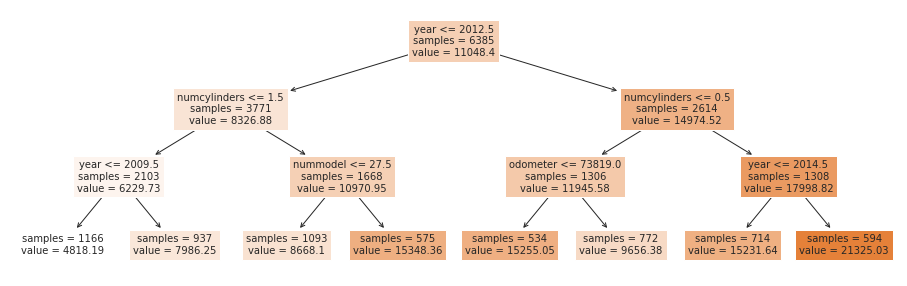

In [93]:
# Diagrama del árbol de decision
fig, ax = plt.subplots(figsize=(16, 5))

print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo2,
            feature_names = datos1.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [94]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos1.drop(columns = "price").columns,
                             'importancia': modelo2.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,year,0.544297
4,numcylinders,0.285630
5,nummodel,0.107069
1,odometer,0.063005
2,numtype,0.000000
3,numdrive,0.000000


Se analizo la capacidad predictiva del árbol empleando el conjunto de test.

Metricas

In [95]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
import multiprocessing

from sklearn.metrics import mean_squared_error
from math import sqrt

In [96]:
y_pred = modelo2.predict(X_test)

# Error de la media de los cuadrados - RMSE
print(f"El error (RMSE) de test es: {sqrt(mean_squared_error(y_test, y_pred))}")
#sqrt(mean_squared_error(y_test, y_pred))

El error (RMSE) de test es: 4916.467380496701


In [97]:
# Error de la media absoluta - MAE
print(f"El error (MAE) de test es: {metrics.median_absolute_error(y_test, y_pred)}")
#metrics.median_absolute_error(y_test, y_pred)

El error (MAE) de test es: 2673.968013468013


In [98]:
# Coeficiente de determinación (R^2)
print(f"El error (R^2) de test es: {metrics.r2_score(y_test, y_pred)}")
#metrics.r2_score(y_test, y_pred)

El error (R^2) de test es: 0.5051029064118514


No hubo mejora con el modelo de arbol de decision

Se probo con Pycaret y recomendo Randon Forest por lo que se creo su modelo a continuacion.

In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [101]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 16, n_estimators = 5)
rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=16, n_estimators=5)

In [102]:
y_pred = rfr.predict(X_test)

Metricas

In [106]:
# Error de la media de los cuadrados - RMSE
print(f"El error (RMSE) de test es: {sqrt(mean_squared_error(y_test, y_pred))}")
#sqrt(mean_squared_error(y_test, y_pred))

El error (RMSE) de test es: 3084.131771578223


In [104]:
# Error de la media absoluta - MAE
print(f"El error (MAE) de test es: {metrics.median_absolute_error(y_test, y_pred)}")
#metrics.median_absolute_error(y_test, y_pred)

El error (MAE) de test es: 1008.2999999999993


In [105]:
# Coeficiente de determinación (R^2)
print(f"El error (R^2) de test es: {metrics.r2_score(y_test, y_pred)}")
#metrics.r2_score(y_test, y_pred)

El error (R^2) de test es: 0.8052513616895017


# **Conclusiones**


1. La mayor cantidad de trabajo invertido fue para limpiar la base de datos a fin que fuera posible su uso.
2.  Para realizar la regresion de los precios de vehiculos, se limito el analisis solo a un fabricante (Ford), ya que no fue posible:
>2.1 Encontrar un metodo mas optimo para depurar los datos de la variable *'model'*.                                                                
>2.2 Crear un modelo que cubriera todas las diferentes variaciones, segun los diferentes fabricantes.
3. Las variables predictores de mayor significancia fueron: *'year'*, *'odometer'*, *'model'* y*'cyliders'*.
4. Se comprobaron tres (3) modelos de regresion, OLS Regression, Decision Tree y RandomForest, siendo esta ultima la mejor (un R^2 de test de 0.8052).
5. El analisis ML con Pycaret señalo que el mejor modelo seria Light Gradient Boosting Machine *'lightgbm'*, pero no se pudo ejecutar con *Scikit learn*.